<a href="https://colab.research.google.com/github/jihnrhd/ForecastingSales/blob/main/Analisis_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>Meeting in Clas 23 - Time Series and Forecasting with Python</font></h1>

## Forecasting with Python - Part 1

###1 Importing dependencies

> Kita akan melakukan `import` software library yang diperlukan untuk sesi ini, antara lain:

**1. Data Manipulasi**
* `pandas`, dapat dialiaskan/disingkat sebagai `pd`
* `numpy`, dapat dialiaskan/disingkat sebagai `np` 

**2. Data Visualisasi**
* `matplotlib.pyplot`, dapat dialiaskan/disingkat sebagai `plt` 
* `seaborn`, dapat dialiaskan/disingkat sebagai `sns` 

**3. Modeling**
* `statsmodels`
  * `statsmodels.api`, dapat dialiaskan/disingkat sebagai `sm` 
  * `statsmodels.tsa.api`, dapat dialiaskan/disingkat sebagai `smt` 
  * `statsmodels.formula.api`, dapat dialiaskan/disingkat sebagai `smf` 
  * adfuller (Augmented Dickey Fuller test)
  * Model ARIMA
  * Model HoltWinters (Model Exponential Smoothing, Simple Exponential Smoothing, Holt)
  * Model SARIMAX
* `sklearn`
  * `sklearn.metrics` (MAE, MAPE, MSE)

**4. Set warning**

**5. %Magic command line**

**6. package, modul lainnya**

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###2 Uploading the data into Jupyter notebook


In [ ]:
# Memanggil data 
data=pd.read_csv('analisis.csv')

# Melihat jumlah baris dan kolom
data.shape

(42, 2)

In [ ]:
# Menampilkan 5 baris terakhir pada dataframe (default n = 5)
data.tail() 

,bulan,total_sales
37,2022-02-01 00:00:00,9616
38,2022-03-01 00:00:00,12235
39,2022-04-01 00:00:00,13944
40,2022-05-01 00:00:00,23599
41,2022-06-01 00:00:00,1795


###3 Data Exploration

* melakukan pre-processing, yaitu mengubah bentuk tipe data 'Month' dari 'object' ke 'datetime'.

In [ ]:
# Menampilkan nama kolom 
data.columns 

Index(['bulan', 'total_sales'], dtype='object')

In [ ]:
# Menampilkan info dari tiap variable
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bulan        42 non-null     object
 1   total_sales  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


> Dapat dilihat tipe data pada 'Month' masih berupa object, sehingga perlu diubah menjadi tipe data datetime menggunakan function pandas yaitu `to_datetime() `

In [ ]:
# Pada kolom Month, ubah tipe data menjadi datetime
data['bulan']=pd.to_datetime(data['bulan'], infer_datetime_format=True)

# Cek tipe data 
print (data.dtypes)

bulan          datetime64[ns]
total_sales             int64
dtype: object


> Ketika *dealing* dengan data time series, dianjurkan untuk menggunakan kolom yang mengandung 'date' sebagai index dari dataframe.

In [ ]:
# Set kolom 'Month' sebagai index
data=data.set_index(['bulan'])
data.head()

,total_sales
bulan,
2019-01-01,35
2019-02-01,113
2019-03-01,241
2019-04-01,403
2019-05-01,521


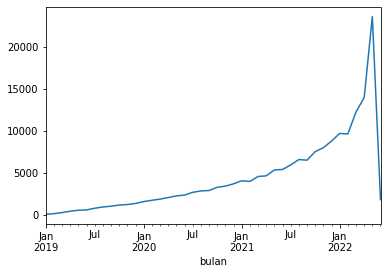

In [ ]:
order=data.total_sales.resample('M').mean().plot()

In [ ]:
data.head()

,total_sales
bulan,
2019-01-01,35
2019-02-01,113
2019-03-01,241
2019-04-01,403
2019-05-01,521


In [ ]:
# Summary statistics pada variabel '#Passengers'
print (data.describe().T)
print ('---------')

# Pembulatan decimal 2 angka di belakang koma
print(data.describe().T.round(2))

             count         mean          std   min      25%     50%      75%  \
total_sales   42.0  4297.809524  4559.807341  35.0  1233.75  2846.5  5782.25   

                 max  
total_sales  23599.0  
---------
             count     mean      std   min      25%     50%      75%      max
total_sales   42.0  4297.81  4559.81  35.0  1233.75  2846.5  5782.25  23599.0


###4 Data Analysis

* mengeksplor data terlebih dahulu melalui visualisasi ke dalam bentuk grafik (Time series plot).

* Tujuan dari time Series plot untuk memudahkan kita menemukan pattern atau pola dan temuan yang tidak biasa 

#### 4.1 Time Series Plot

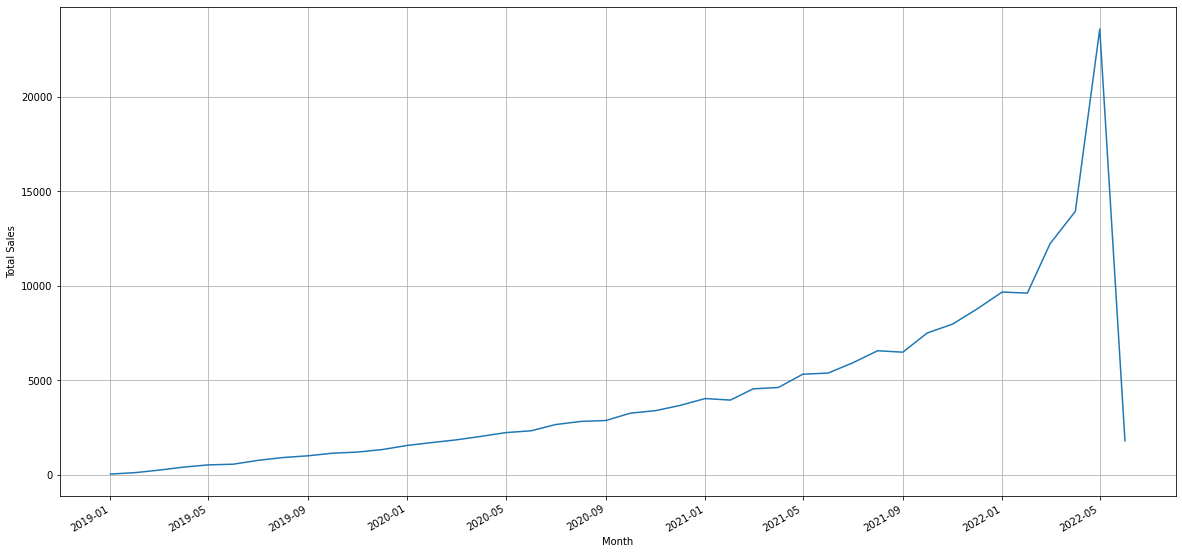

In [ ]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Total Sales")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data)
fig.autofmt_xdate()
plty.grid()
plty.show()


> **Insights:**

* Dari grafik di atas, kita dapat melihat bahwa dari data jumlah penumpang memiliki kombinasi yang terdiri dari beberapa pola yaitu tren yang menaik kemudian turun pada bulan ke 6

* kemudian membuat visualisasi seasonal plot.



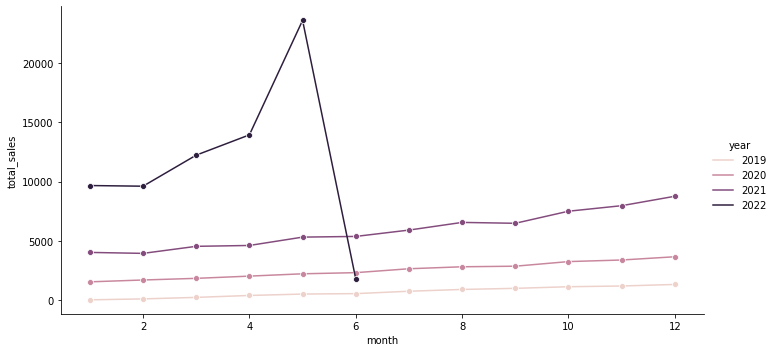

In [ ]:
# Seasonal plot 

data2 = data.reset_index()
data2['year'] = pd.DatetimeIndex(data2['bulan']).year
data2['month'] = pd.DatetimeIndex(data2['bulan']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = data2, x = 'month', y = 'total_sales', hue = 'year', aspect = 2, marker='o' )

* Selanjutnya


---


kita dapat cek secara visual (menggunakan rolling mean & std) dan melakukan uji statistik (statistical test) dengan Dickey-Fuller tes untuk melakukan konfirmasi apakah data yang dimiliki merepresentasikan bentuk stasioner. 

#### 4.2 Stationarity Check - Rolling Statistic test

* membuat rolling window dengan ukuran yang spesifik dan akan melakukan kalkulasi pada data dalam window tsb


In [ ]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=data.rolling(window=12).mean()  

# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=data.rolling(window=12).std() 

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))            

15 baris pertama rolling mean: 
            total_sales
bulan                  
2019-01-01          NaN
2019-02-01          NaN
2019-03-01          NaN
2019-04-01          NaN
2019-05-01          NaN
2019-06-01          NaN
2019-07-01          NaN
2019-08-01          NaN
2019-09-01          NaN
2019-10-01          NaN
2019-11-01          NaN
2019-12-01   684.666667
2020-01-01   811.083333
2020-02-01   943.916667
2020-03-01  1077.666667

15 baris pertama std. deviasi: 
            total_sales
bulan                  
2019-01-01          NaN
2019-02-01          NaN
2019-03-01          NaN
2019-04-01          NaN
2019-05-01          NaN
2019-06-01          NaN
2019-07-01          NaN
2019-08-01          NaN
2019-09-01          NaN
2019-10-01          NaN
2019-11-01          NaN
2019-12-01   438.850012
2020-01-01   452.960857
2020-02-01   463.241437
2020-03-01   473.431637


> Lalu, kita akan visualisasikan dari hasil rolling mean dan rolling std. deviasi untuk mengecek apakah apakah series ini stasioner atau tidak melalui bentuk visual grafik di bawah.

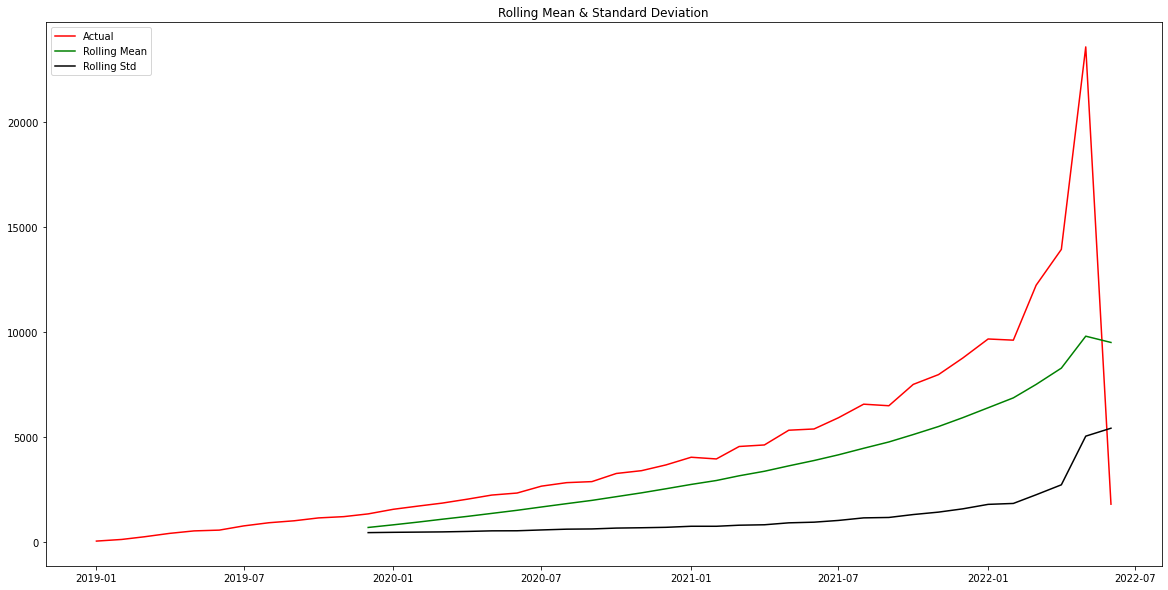

In [ ]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> **Insights:**

Dari grafik di atas kita dapat melihat bahwa data aktual dan rolling (mean dan std) memiliki bentuk yang cukup berbeda, menandakan bahwa **series** ini **tidak stasioner**.

#### 4.3 Stationarity Check - Augmented Dickey-Fuller (ADF) test

* Selanjutnya, kita akan gunakan ADF test untuk uji stasioner dimana: 

  **H0:** *The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.*

 **H1:** *The time series is stationary.*

* Jika p-value test kurang dari significance level (contoh alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka kita dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

In [ ]:
# menggunakan function adfuller() yang diterapkan pada variable #total_sales
print('Dickey-Fuller Test: ')
dftest=adfuller(data['total_sales'], autolag='AIC')
dftest


Dickey-Fuller Test: 


(-1.9364488732944771,
 0.3151133791423919,
 10,
 31,
 {'1%': -3.661428725118324,
  '10%': -2.6193188033298647,
  '5%': -2.960525341210433},
 540.309579517285)

In [ ]:
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -1.936449
p-value                  0.315113
Lags Used               10.000000
No. of Obs              31.000000
Critical Value (1%)     -3.661429
Critical Value (5%)     -2.960525
Critical Value (10%)    -2.619319
dtype: float64


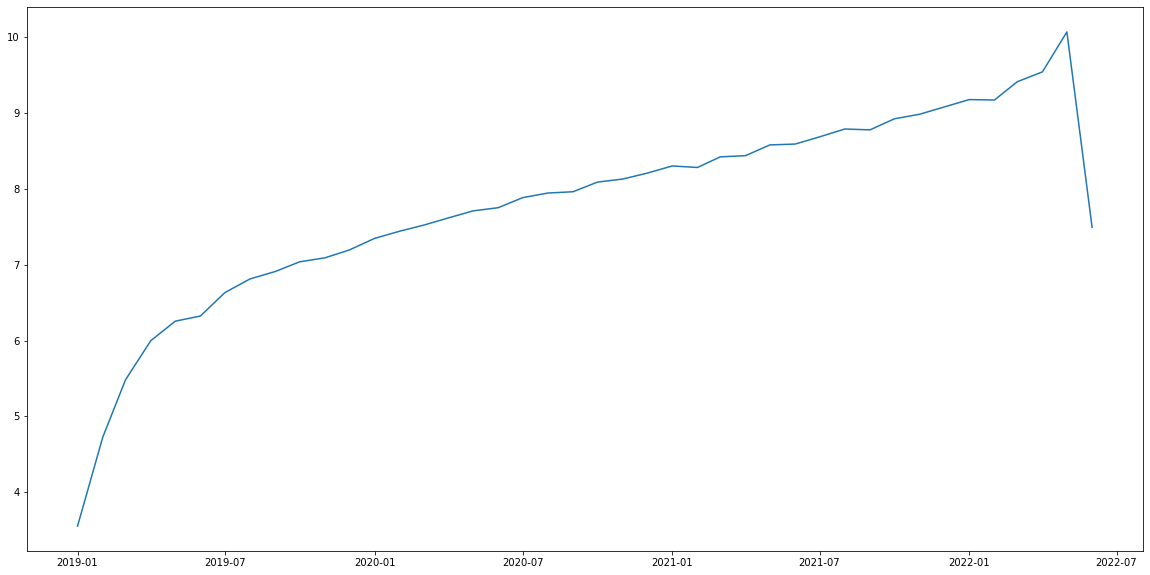

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(data) 
plt.plot(data_log)

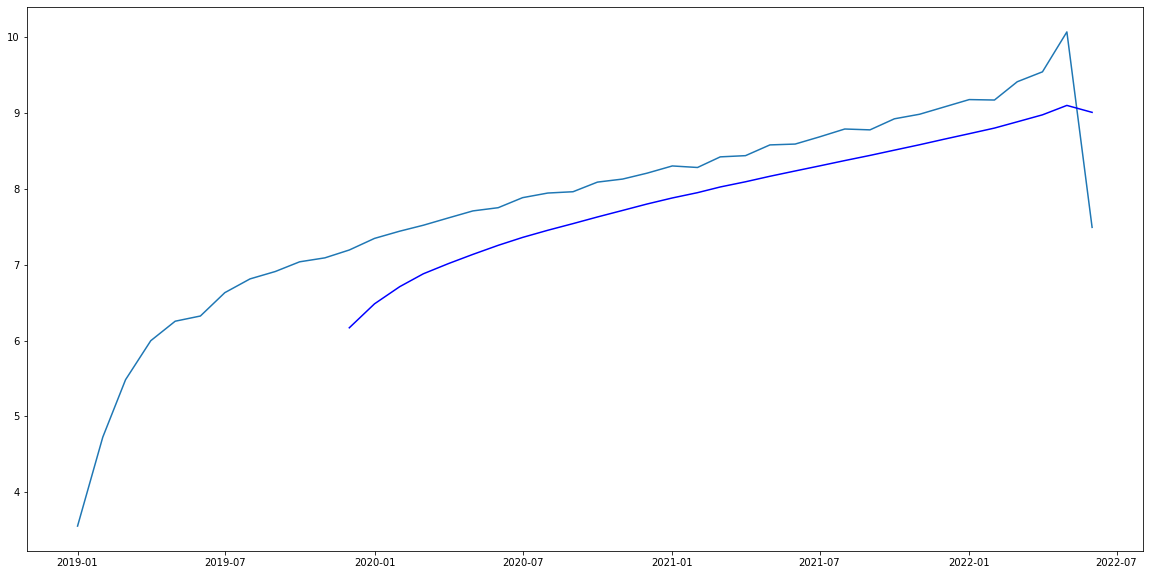

In [ ]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

,total_sales
bulan,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,NaN
2019-05-01,NaN
2019-06-01,NaN
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN


In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,total_sales
bulan,
2019-12-01,1.025528
2020-01-01,0.862395
2020-02-01,0.731329
2020-03-01,0.639948
2020-04-01,0.602029


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total_sales'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

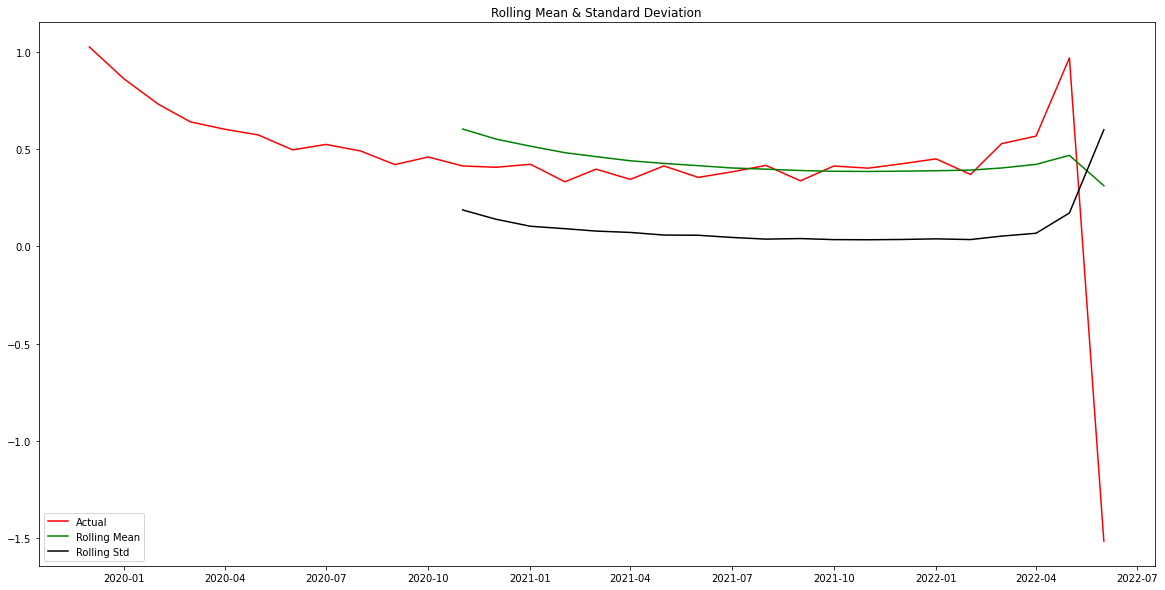

Dickey-Fuller Test: 
Test Statistic           0.271918
p-value                  0.976019
Lags Used                7.000000
No. of Obs              23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64


In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(data_log_diff)

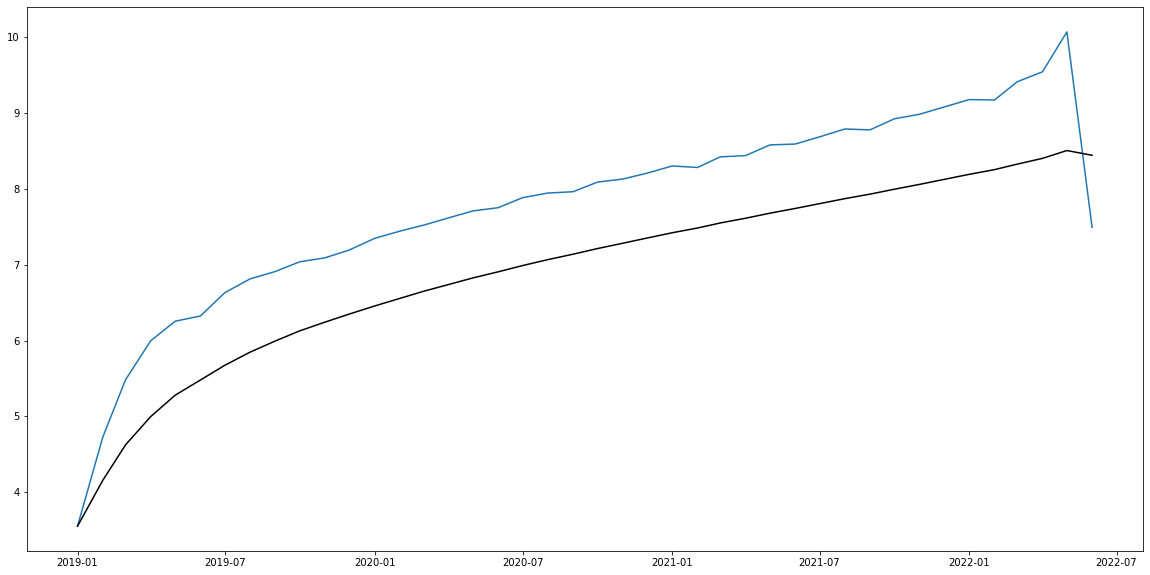

In [ ]:
# Visualisasikan ke dalam bentuk chart 
plt.figure(figsize=(20,10))

# Terapkan function ewm pada data_log melalui variable exp_data
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 

plt.plot(data_log)
plt.plot(exp_data, color='black')

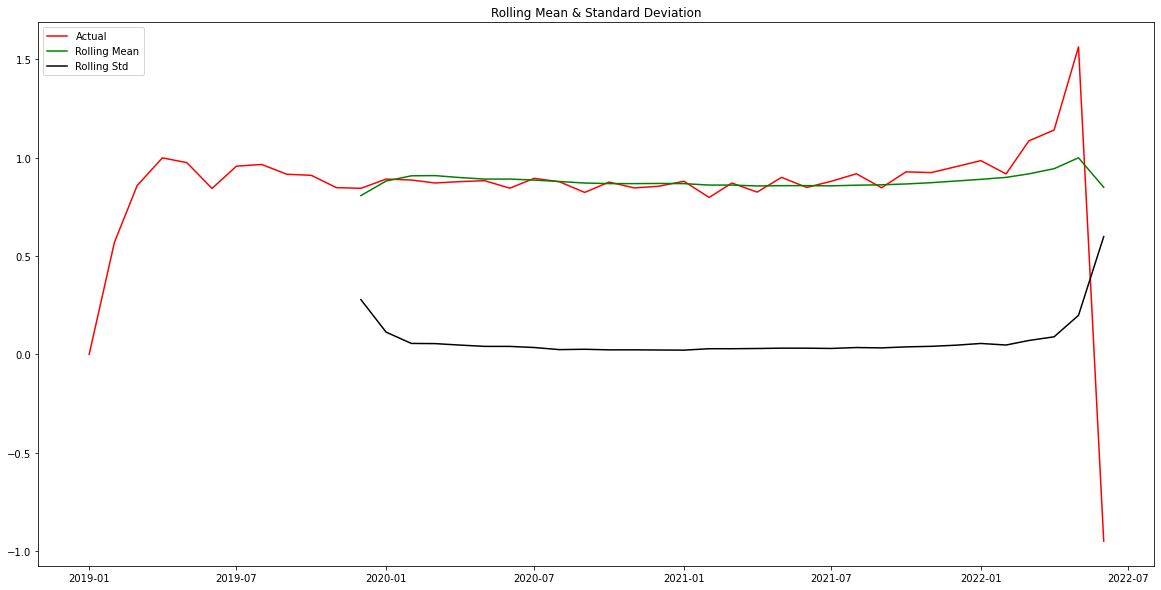

Dickey-Fuller Test: 
Test Statistic          -3.174670
p-value                  0.021498
Lags Used                3.000000
No. of Obs              38.000000
Critical Value (1%)     -3.615509
Critical Value (5%)     -2.941262
Critical Value (10%)    -2.609200
dtype: float64


In [ ]:
# Hitung difference antara data_log dengan exp_data
exp_data_diff=data_log-exp_data

# Panggil function stationarity dan terapkan pada exp_data_diff
stationarity(exp_data_diff)

#### 4.4 Stationarity Check - Shift test

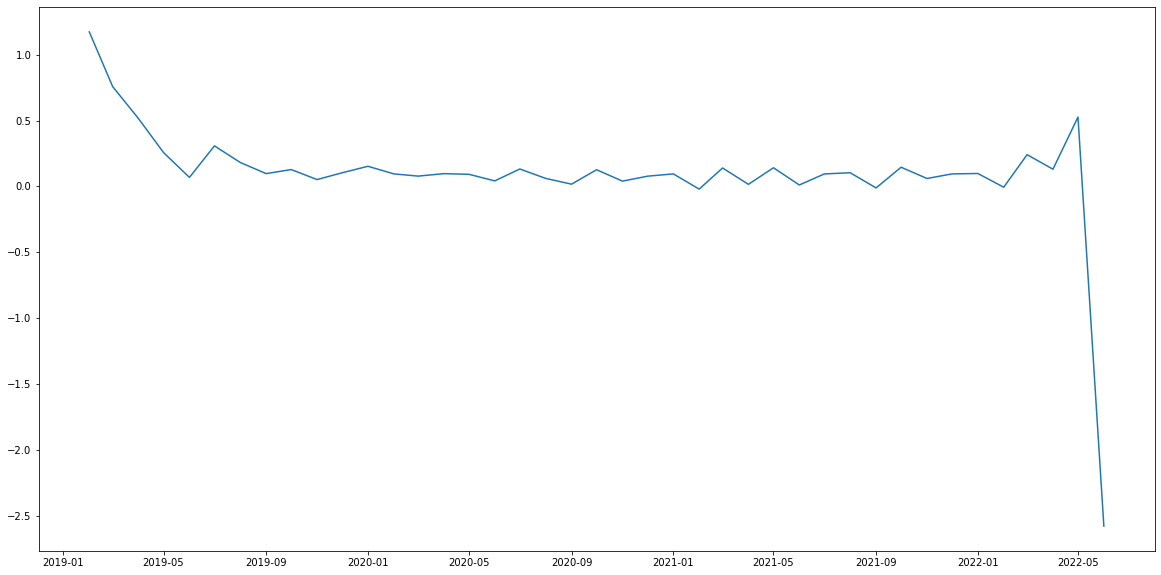

In [ ]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

total_sales    1
dtype: int64

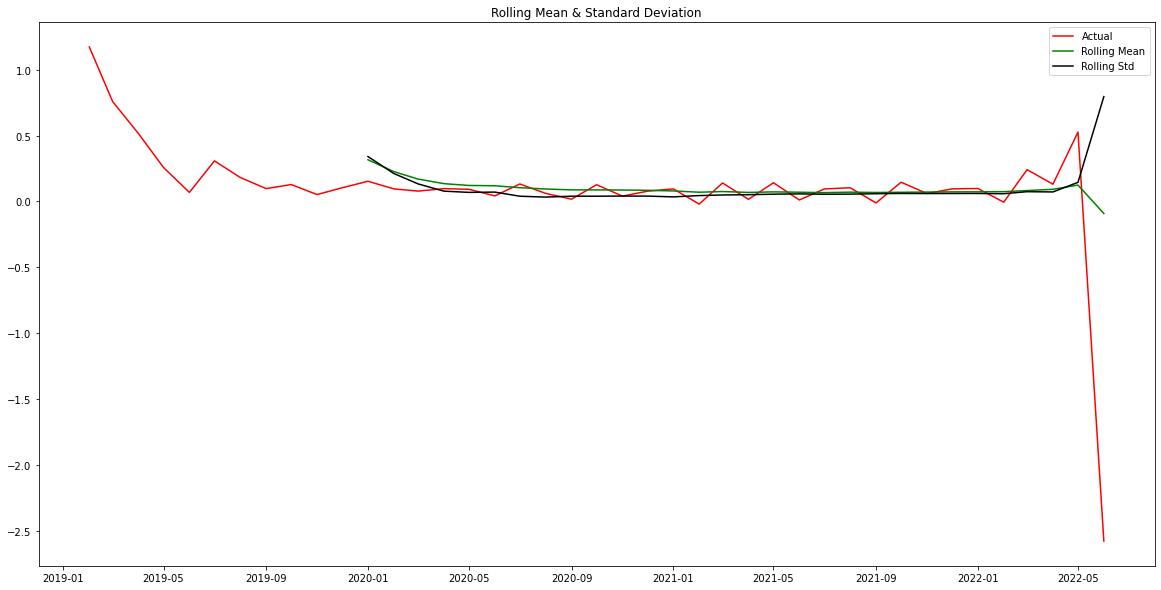

Dickey-Fuller Test: 
Test Statistic          -4.989975
p-value                  0.000023
Lags Used                2.000000
No. of Obs              38.000000
Critical Value (1%)     -3.615509
Critical Value (5%)     -2.941262
Critical Value (10%)    -2.609200
dtype: float64


In [ ]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

#### 4.5 Decomposition and Autocorrelation Function

* Forecasting menggunakan data historikal dimana diurutkan dengan waktu, sehingga goal dari time series model yaitu untuk menemukan waktu dengan trend, seasonality, dan autocorrelation (correlation over time) lalu diformulasikan menjadi sebuah model.

* Teknik Decomposition ini digunakan untuk split data time series menjadi beberapa komponen yaitu trend, seasonality, dan noise (residual) components. 

* Setiap komponen dapat digunakan untuk menunjukkan pola (pattern) yang ada di dalam tiap kategori agar dapat menentukan apakah model Additive atau Multiplicative.

  * **Seasonality**: describes the periodic signal in your time series.
  * **Trend**: describes whether the time series is decreasing, constant, or increasing over time.
  * **Noise**: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.


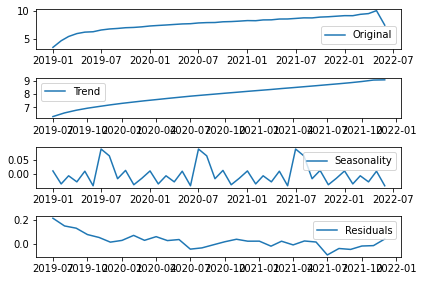

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

> **Insights:**

* Dari proses seasonal decompose, maka akan terbagi 
menjadi grafik original, trend (dalam hal ini dengan pola menaik), Seasonality (pola berulang yang terjadi dari tahun ke tahun), dan residuals (seberapa jauh titik data dari garis regresi).

* Dapat dilihat bahwa trend dari time series AirPassenger adalah semakin menaik, dan seasonality mengikuti pola. 

In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
             total_sales
bulan                  
2019-01-01          NaN
2019-02-01          NaN
2019-03-01          NaN
2019-04-01          NaN
2019-05-01          NaN
2019-06-01          NaN
2019-07-01     6.326907
2019-08-01     6.598034
2019-09-01     6.795996
2019-10-01     6.948279
2019-11-01     7.076314
2019-12-01     7.196379
2020-01-01     7.308035
2020-02-01     7.407366
2020-03-01     7.498342
2020-04-01     7.585928
2020-05-01     7.672967
2020-06-01     7.758436
2020-07-01     7.840422
2020-08-01     7.915191
2020-09-01     7.987720
2020-10-01     8.059445
2020-11-01     8.129863
2020-12-01     8.201054 

Seasonal 
             total_sales
bulan                  
2019-01-01     0.010546
2019-02-01    -0.035942
2019-03-01    -0.006847
2019-04-01    -0.028556
2019-05-01     0.009576
2019-06-01    -0.042532
2019-07-01     0.088944
2019-08-01     0.064556
2019-09-01    -0.017314
2019-10-01     0.012427
2019-11-01    -0.038873
2019-12-01    -0.015984
2020-01-01     0.01

> **Insights:**

Dari data residual, kita dapat melihat banyak NA value, maka kita lakukan dropna

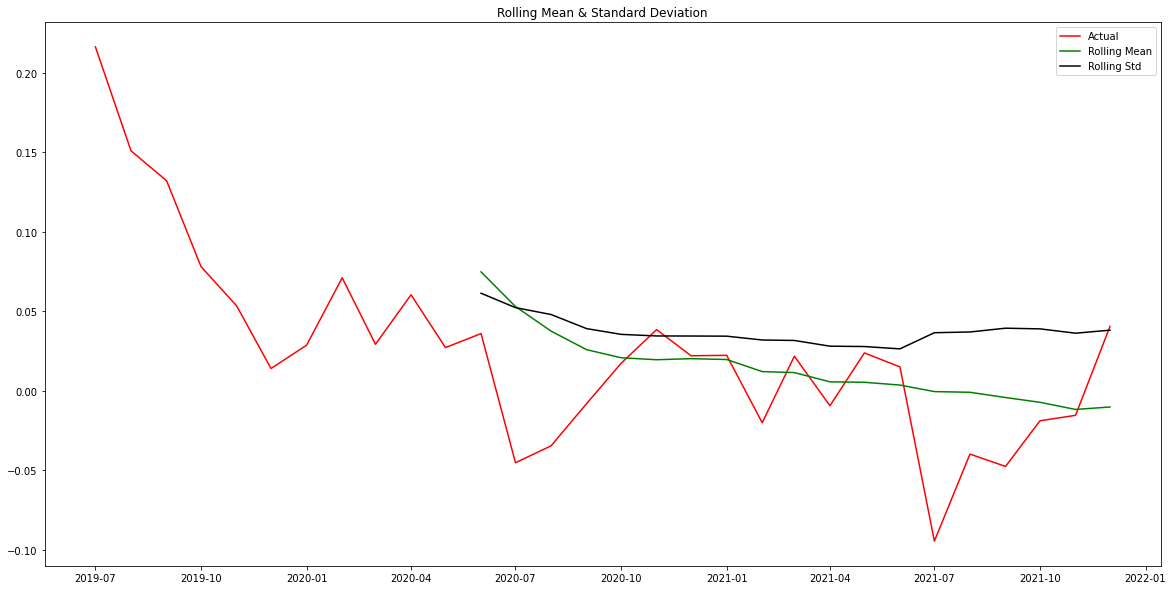

Dickey-Fuller Test: 
Test Statistic          -3.732034
p-value                  0.003684
Lags Used                0.000000
No. of Obs              29.000000
Critical Value (1%)     -3.679060
Critical Value (5%)     -2.967882
Critical Value (10%)    -2.623158
dtype: float64


In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual

# terapkan function dropna
decomp_data=decomp_data.dropna()

# Panggil function stationarity dan terapkan pada decomp data yang tanpa NA value
stationarity(decomp_data)

> **Insights:**

Dari komponen data residual, hasil ADF test menunjukkan bahwa bahwa nilai Test statistic yg jauh lebih kecil daripada critical value pd berbagai tingkat keyakinan. Dan p-value yang jauh lebih kecil dari 0.05, kita dapat menyatakan bahwa series ini cukup kuat stasioner.

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

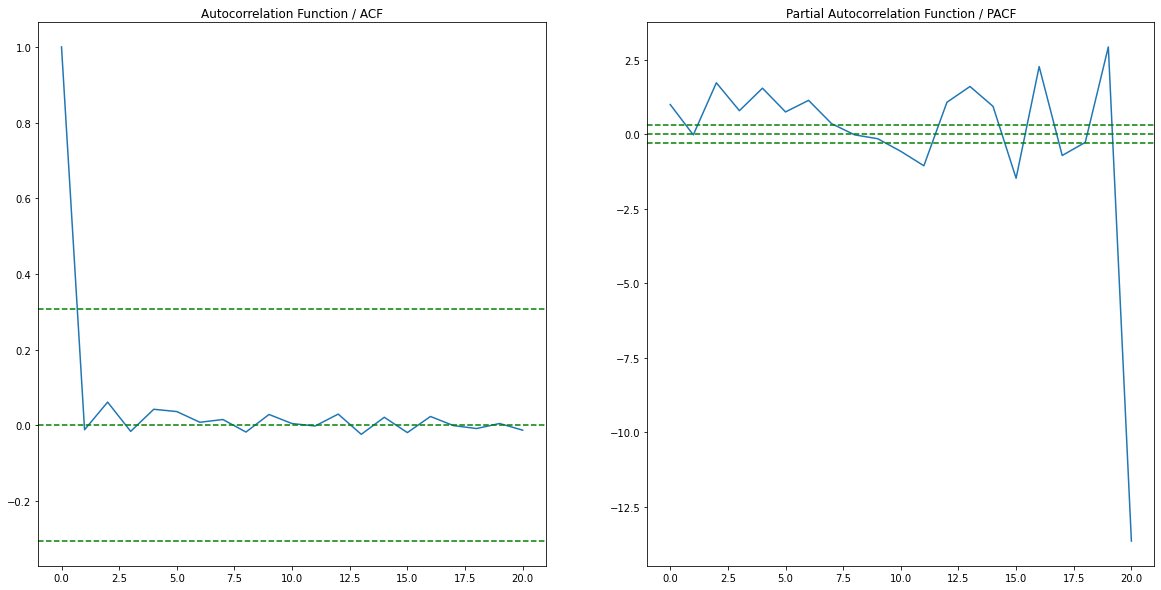

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

###5 Model Development

> Pada Model Development, kita akan mencoba menerapkan 2 model time series yaitu:
1. Holt-Winters
2. SARIMAX (pada dasarnya ini adalah ARIMA, yang memang spesifik untuk menghadapi seasonal effect seperti yg dialami oleh data yg sedang kita olah ini)


* Pisahkan data time series menjadi train dan test data




In [ ]:
# Split the data 
train = data[0:int(len(data)*0.80)]   #train data sebesar 80%
test = data[int(len(data)*0.80):]     #test data sebesar 20%

#### **1. HoltWinters**

****

* Metode Holt-Winters adalah model dari time series behavior. Forecasting selalu memerlukan model, dan Holt-Winters adalah salah satu cara untuk modeling 3 aspek dari time series, yaitu : nilai rata-rata, slope dan seasonality

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['total_sales']),seasonal_periods=16, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
#copy 29 bulan periode (1958-01 - 1960-12) untuk test dan assign ke data_Holt
data_Holt = test.copy() 

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['total_sales']))

In [ ]:
data_Holt.tail()

,total_sales,Holt
bulan,,
2022-02-01,9616,12606.296405
2022-03-01,12235,13586.220167
2022-04-01,13944,14779.519136
2022-05-01,23599,15742.832236
2022-06-01,1795,14717.836976


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 2917.9996364097747,
 'initial_seasons': array([0.21470212, 0.2179429 , 0.21287494, 0.26171528, 0.26650722,
        0.29657049, 0.30216231, 0.31167535, 0.31564002, 0.28123826,
        0.28766992, 0.26026094, 0.2664752 , 0.23907652, 0.23507678,
        0.23588907]),
 'initial_slope': 188.28117195239838,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.9762484766541911,
 'smoothing_seasonal': 4.876365888278077e-06,
 'smoothing_slope': 0.4278030896678841,
 'use_boxcox': False}

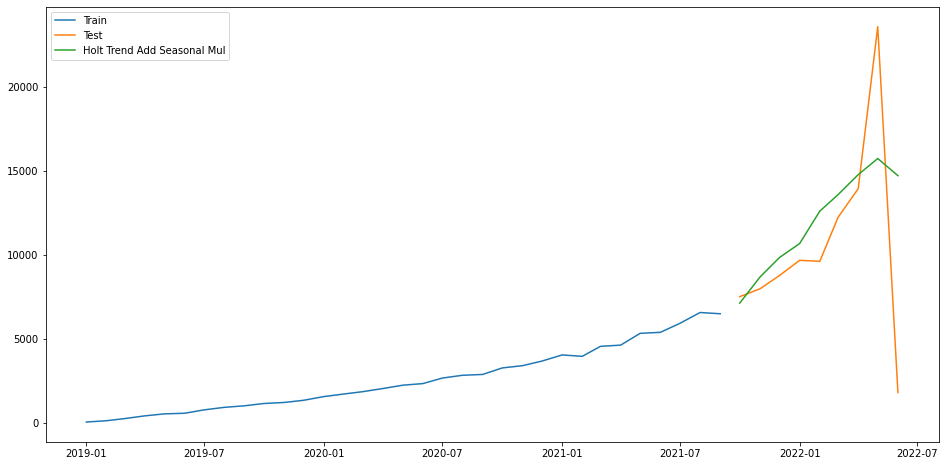

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['total_sales'], label='Train')
plt.plot(test['total_sales'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

> **Keterangan:**

* Dari grafik di atas terlihat bahwa model Holt-winters mulai melakukan prediksi yang ditunjukkan oleh garis berwarna hijau. 

* Garis berwarna biru merupakan data yang digunakan untuk train dan garis berwarna oranye yang digunakan untuk test.

#### **2. SARIMAX**

****

* **SARIMAX** (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) adalah versi update dari model ARIMA, dapat dikatakan bahwa SARIMAX model seasonal equivalent seperti halnya SARIMA dan Auto ARIMA, yang mana model ini dapat juga memperhitungkan efek eksternal.

* Karena ARIMA tidak mendukung seasonality, maka beda dengan SARIMAX yang dapat digunakan pada data set yang memiliki siklus musiman (*seasonality*).

* terdiri dari 3 parameter yaitu (p, d, dan q)
  * p is the order of the AR term
  * q is the order of the MA term
  * d is the number of differencing required to make the time series stationary

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
train_log = np.log10(train['total_sales'])

In [ ]:
for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 model - AIC:-83.04257272701061


In [ ]:
# tampilkan hasil dari SARIMAX
mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(1,1,0),
                                seasonal_order=(0,0,0,12),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9784      0.018     54.251      0.000       0.943       1.014
sigma2         0.0035      0.001      4.461      0.000       0.002       0.005


In [ ]:
# Terapkan function get_prediction() pada best_results
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci 

,lower total_sales,upper total_sales
2019-01-01,-1959.964065,1959.964065
2019-02-01,-1959.964302,1959.964302
2019-03-01,-1959.964693,1959.964693
2019-04-01,-1959.965235,1959.965235
2019-05-01,-1959.965924,1959.965924
2019-06-01,-1959.966756,1959.966756
2019-07-01,-1959.967730,1959.967730
2019-08-01,-1959.968841,1959.968841
2019-09-01,-1959.970087,1959.970087
2019-10-01,-1959.971465,1959.971465


In [ ]:
pred99 = best_results.get_forecast(steps=20, alpha=0.1)
pred99

In [ ]:
# Extract the predicted and true values of our time series
# sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['total_sales_Forecast'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy.tail(10)

,total_sales,total_sales_Forecast
bulan,,
2021-10-01,7507,6417.408840
2021-11-01,7973,6348.131294
2021-12-01,8768,6281.076672
2022-01-01,9672,6216.158564
2022-02-01,9616,6153.294608
2022-03-01,12235,6092.406267
2022-04-01,13944,6033.418622
2022-05-01,23599,5976.260172
2022-06-01,1795,5920.862661


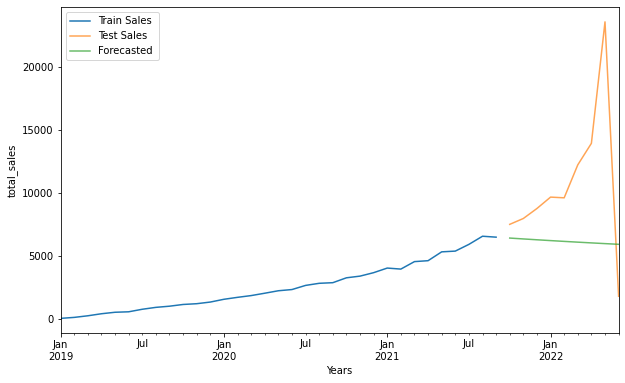

In [ ]:
# visualisasikan dari antara train, test, dan hasil forecast

axis = train['total_sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy['total_sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['total_sales_Forecast'].plot(ax=axis, label='Forecasted ', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('total_sales')
plt.legend(loc='best')
plt.show()
plt.close()

###6 Plot forecast with Confidence band

> Tahap ini kita akan melakukan visualisasi nilai prediksi beserta interval keyakinan

**Forecast #Passengers using the best fit model**

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2022-06-01,6417.408840,4912.253147,8383.756901,4912.253147,8383.756901
2022-07-01,6348.131294,3510.182007,11480.536010,3510.182007,11480.536010
2022-08-01,6281.076672,2349.835359,16789.229083,2349.835359,16789.229083
2022-09-01,6216.158564,1491.314747,25910.444039,1491.314747,25910.444039
2022-10-01,6153.294608,904.646337,41853.963223,904.646337,41853.963223


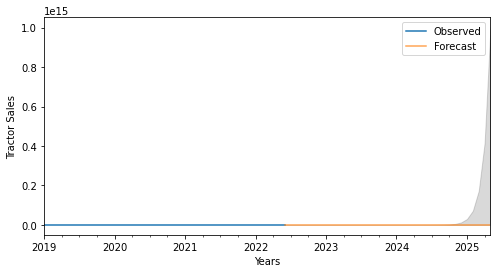

In [ ]:
# plot the forecast along with the confidence band
axis = data['total_sales'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

### 7 Model Evaluation

>Sekarang kita akan melakukan validasi dan evaluasi terhadap model yang telah kita buat

**Plot ACF and PACF for residuals of SARIMAX model**

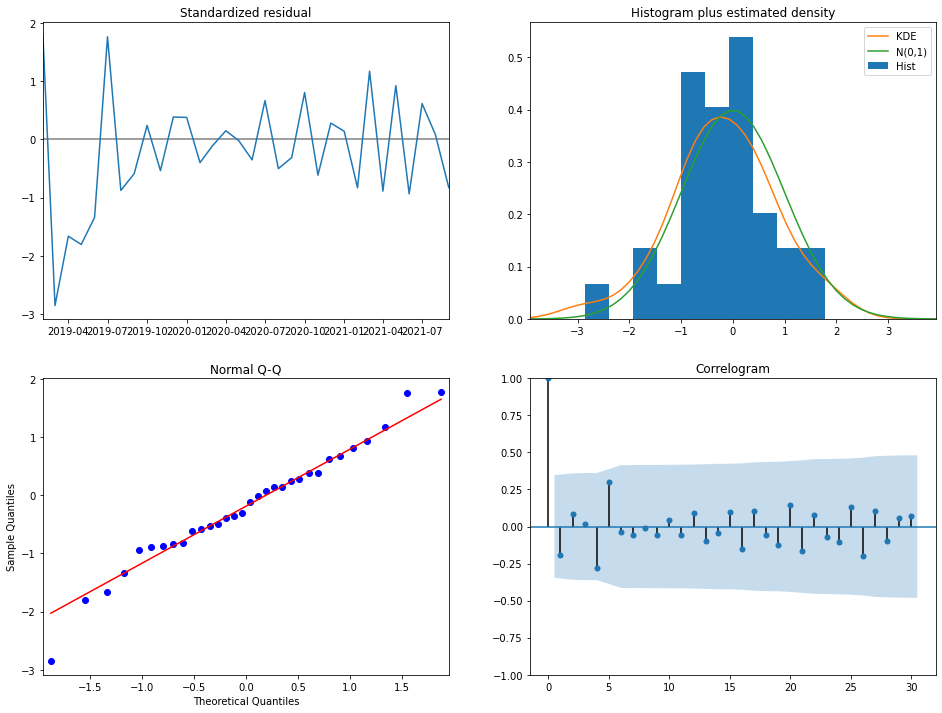

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

* Grafik standardized residuals menunjukkan bahwa sebagian besar titik sudah berada pada y=0 yang berarti bahwa prediksi tidak menyimpang jauh dari data aktual.

* Grafik histogram sudah menunjukkan kecenderungan normal (garis hijau adalah grafik garis dari ujung histogram) dan KDE menunjukkan grafik kecocokan prediksi.

* Q–Q plot adalah probability plot, yang mana digunakan untuk mengecek apakah data kita berada pada garis normal. 

* Correlogram, juga dikenal sebagai Auto Correlation Function (ACF) plot, meruapakan cara grafis untuk memperlihatkan korelasi serial pada data yang tidak selalu konstan dalam kurun waktu tertentu. Correlogram akan memperlihatkan gambaran apakah terdapat auto-correlation diantara pasangan data pada kurun waktu yang berbeda.

> Model performance based on MAE, MSE, RMSE, MAPE

* Model HoltWinters

In [ ]:
# Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['total_sales'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(test['total_sales'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['total_sales'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  3234.796
Mean Absolute Percentage Error of our forecasts is  93.09  %
The Mean Squared Error of our forecasts is 26997023.391
The Root Mean Squared Error of our forecasts is 5195.866


* Model SARIMAX

In [ ]:
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = test['total_sales']
y_pred = testCopy['total_sales_Forecast']

print('The Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true, y_pred).round(3))
print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true, y_pred).round(3), '%')
print ('The Mean Squared Error of our forecasts is ', mean_squared_error(y_true, y_pred).round(3))
print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(y_true, y_pred)).round(3))


The Mean Absolute Error of our forecasts is  5324.634
The Mean Absolute Percentage Error of our forecasts is  0.607 %
The Mean Squared Error of our forecasts is  51315313.416
The Root Mean Squared Error of our forecasts is  7163.471


In [ ]:
mape = np.mean(np.abs(y_pred - y_true)/np.abs(data))


In [ ]:
mape

2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
2022-02-01 00:00:00   NaN
2022-03-01 00:00:00   NaN
2022-04-01 00:00:00   NaN
2022-05-01 00:00:00   NaN
2022-06-01 00:00:00   NaN
total_sales           NaN
dtype: float64

* Export hasil model SARIMAX dalam bentuk .CSV

In [ ]:
print("Export to CSV..")

# refer to point 6
fc_all.to_csv("sales_prediction.csv", index=True)
print("Done!")

Export to CSV..
Done!
